In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\abhishek ambawale\\Downloads\\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.rename(columns={'Unnamed: 0':'States'},inplace=True)

In [4]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
X = df[['Murder','Assault','UrbanPop','Rape']]

In [6]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
## Performing Scaling for better results.

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# K-Means Clustering.

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(X_scaled)
    wcss.append(km.inertia_)

C:\Users\abhishek ambawale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[200.0,
 104.96163315756871,
 79.95548163171664,
 57.55425863091104,
 50.56398867511114,
 44.177813752975325,
 40.43585681127954,
 35.646950868341364,
 33.08658332787964,
 28.701656736171493]

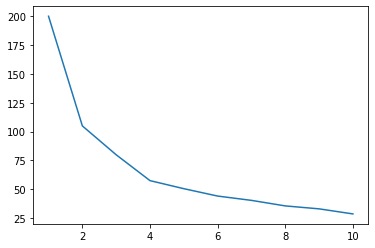

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

The kinks appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.

In [13]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X_scaled)

In [14]:
y_means

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

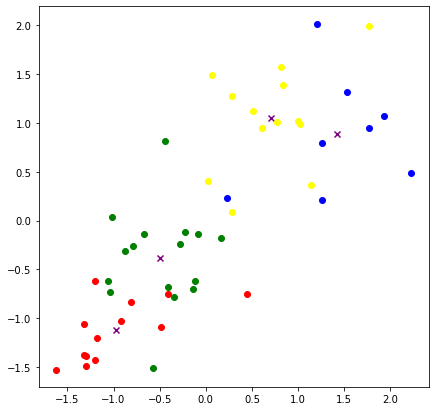

In [15]:
clusters = KMeans(4)
clusters.fit(X_scaled)
plt.figure(figsize=(7, 7))
clusters.labels_
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='purple')
plt.scatter(X_scaled[y_means== 0,0],X_scaled[y_means== 0,1],color='blue')
plt.scatter(X_scaled[y_means== 1,0],X_scaled[y_means== 1,1],color='yellow')
plt.scatter(X_scaled[y_means== 2,0],X_scaled[y_means== 2,1],color='green')
plt.scatter(X_scaled[y_means== 3,0],X_scaled[y_means== 3,1],color='red')
plt.show()

# Hierarchial Clustering.

In [16]:
import scipy.cluster.hierarchy as shc

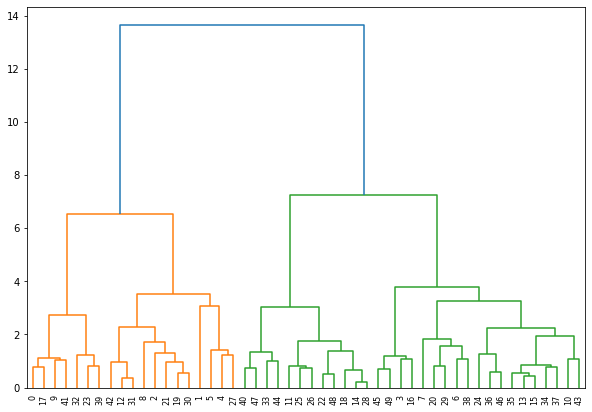

In [17]:
plt.figure(figsize=(10,7))

dend = shc.dendrogram(shc.linkage(X_scaled,method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
labels = cluster.fit_predict(X_scaled)

In [20]:
labels

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

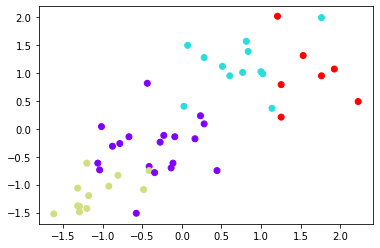

In [21]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=cluster.labels_,cmap='rainbow')

# DBSCAN Clustering.

In [22]:
from sklearn.cluster import DBSCAN

In [66]:
cluster = DBSCAN(eps=1,metric='euclidean',min_samples=3)
labels = cluster.fit_predict(X_scaled)

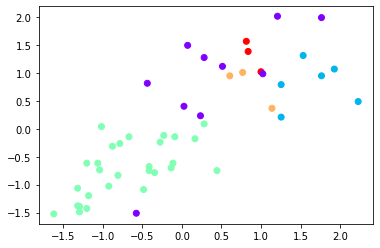

In [67]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = cluster.labels_, cmap = 'rainbow')
plt.show()

In [68]:
cluster.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)